# <span style="color:#FFD600"> Project Ironhack Payments

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [53]:
df_cash_requests= pd.read_csv(r"C:\DSML bootcamp\Projects\Ironhack Payments\project_dataset\extract - cash request - data analyst.csv")
df_fees= pd.read_csv(r"C:\DSML bootcamp\Projects\Ironhack Payments\project_dataset\extract - fees - data analyst - .csv")

In [54]:
df_cash_requests.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [55]:
df_fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


## <span style="color:#64B5F6">Data Quality Analysis + EDA

#### <span style="color:#BBDEFB">Info

In [56]:
df_fees.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [57]:
df_cash_requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

#### <span style="color:#BBDEFB">Null values

In [58]:
df_cash_requests.isnull()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,False,False,False,False,False,False,False,True,False,True,True,False,True,True,True,True
1,False,False,False,False,False,False,False,True,False,True,True,False,True,True,True,True
2,False,False,False,False,False,False,False,True,False,True,True,False,True,True,True,True
3,False,False,False,False,False,False,False,True,False,True,True,False,True,True,True,True
4,False,False,False,False,False,False,False,True,False,True,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,False,False,False,False,False,False,True,True,False,False,False,False,False,True,True,True
23966,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
23967,False,False,False,False,False,False,True,True,False,False,False,False,False,True,True,True
23968,False,False,False,False,False,False,True,True,False,False,False,False,False,True,True,True


In [59]:
df_fees.isnull()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,False,False,False,False,True,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,True,False,False,False,False,False,True,True,False
3,False,False,False,False,True,False,False,False,False,False,True,True,False
4,False,False,False,False,True,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21056,False,False,False,False,True,False,False,False,False,False,True,True,False
21057,False,False,False,False,True,False,False,False,False,False,True,True,False
21058,False,False,False,False,True,False,False,False,False,False,True,True,False
21059,False,False,False,False,True,False,False,False,False,False,True,True,False


#### <span style="color:#BBDEFB">Duplicates

In [60]:
df_cash_requests.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23965    False
23966    False
23967    False
23968    False
23969    False
Length: 23970, dtype: bool

In [61]:
df_fees.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21056    False
21057    False
21058    False
21059    False
21060    False
Length: 21061, dtype: bool

#### <span style="color:#BBDEFB">Value counts

In [104]:
df_cash_requests.value_counts()

Series([], Name: count, dtype: int64)

In [103]:
df_fees.value_counts()

Series([], Name: count, dtype: int64)

## <span style="color:#64B5F6">Data Preparation

#### <span style="color:#BBDEFB">Cleaned DataFrame

In [63]:
cash_request_clean = df_cash_requests[['id','created_at','updated_at','send_at','status']]

In [64]:
fees_clean=df_fees[['id','type','category','status','total_amount']]

In [65]:
print(cash_request_clean.dtypes)

id             int64
created_at    object
updated_at    object
send_at       object
status        object
dtype: object


In [66]:
print(fees_clean.dtypes)

id                int64
type             object
category         object
status           object
total_amount    float64
dtype: object


#### <span style="color:#BBDEFB">Type Conversion

In [67]:
cash_request_clean = df_cash_requests[['id', 'created_at', 'updated_at', 'send_at', 'status']].copy()

columns_to_convert = ['created_at', 'updated_at', 'send_at']

for column in columns_to_convert:
    cash_request_clean[column] = pd.to_datetime(cash_request_clean[column], errors='coerce')

print(cash_request_clean.dtypes)

id                          int64
created_at    datetime64[ns, UTC]
updated_at    datetime64[ns, UTC]
send_at       datetime64[ns, UTC]
status                     object
dtype: object


## <span style="color:#64B5F6">Exploratory Analysis

#### <span style="color:#BBDEFB">Univariate analysis 

C:\Users\naatt\AppData\Local\Temp\ipykernel_25228\4126586655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


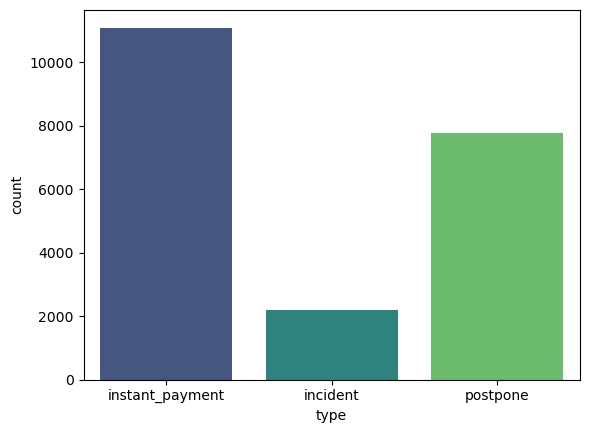

In [68]:
type_counts = fees_clean['type'].value_counts().reset_index()

sns.countplot(
    x="type",
    data=fees_clean,

    palette='viridis',
    legend=False,
)
plt.show()

C:\Users\naatt\AppData\Local\Temp\ipykernel_25228\565038491.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


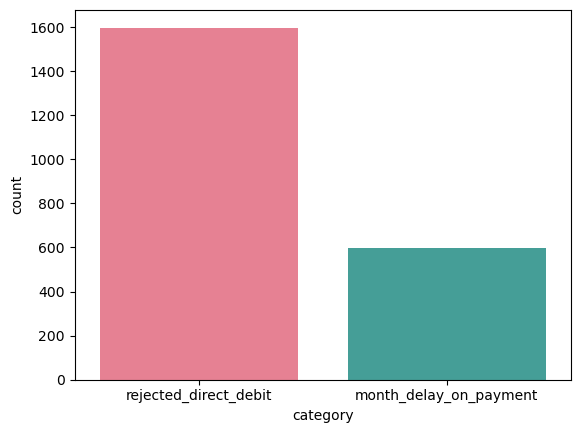

In [69]:
sns.countplot(
    x='category',
    data=fees_clean,
    palette='husl',
    legend= False , 
)
plt.show()

C:\Users\naatt\AppData\Local\Temp\ipykernel_25228\3238494460.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='type', ylabel='count'>

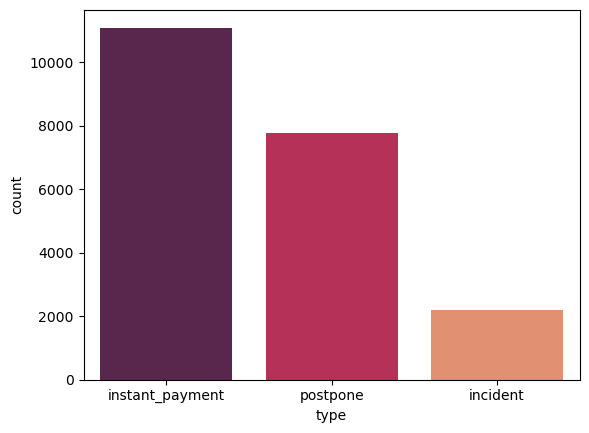

In [70]:
sns.barplot(
    x='type',
    y='count',
    data=type_counts,
    palette='rocket'
)

C:\Users\naatt\AppData\Local\Temp\ipykernel_25228\3022530650.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='category', ylabel='count'>

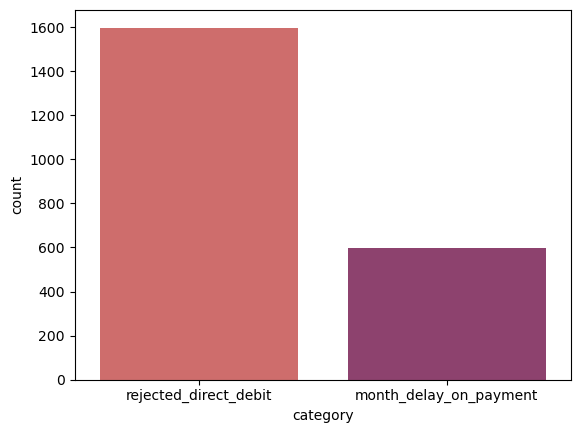

In [71]:
type_counts = fees_clean["category"].value_counts().reset_index()

sns.barplot(
    x='category',
    y='count',
    data=type_counts,
    palette='flare',
    legend=True
)

C:\Users\naatt\AppData\Local\Temp\ipykernel_25228\301391978.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


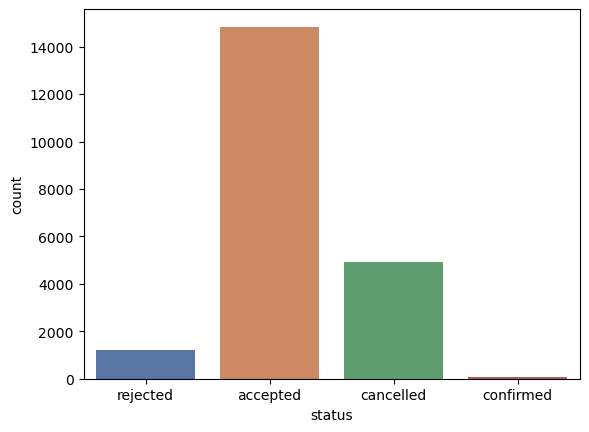

In [72]:
sns.countplot(
    x='status',
    data=fees_clean,
    palette='deep',
    legend= False , 
)
plt.show()

C:\Users\naatt\AppData\Local\Temp\ipykernel_25228\2018287127.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='status', ylabel='count'>

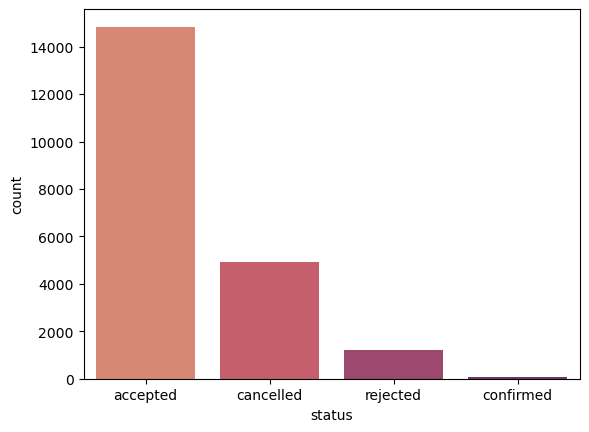

In [73]:
type_counts = fees_clean["status"].value_counts().reset_index()
type_counts.head()
sns.barplot(
    x='status',
    y='count',
    data=type_counts,
    palette='flare',
    legend=True
)

In [74]:
type_counts.head()

,status,count
0,accepted,14841
1,cancelled,4938
2,rejected,1194
3,confirmed,88


## <span style="color:#64B5F6">Advanced Analysis

#### <span style="color:#BBDEFB">Cohorts Creating

In [75]:
user_first_send = cash_request_clean.groupby('id')['send_at'].min().reset_index()

user_first_send.columns = ['user_id', 'first_send_date']

user_first_send['cohort'] = user_first_send['first_send_date'].dt.strftime('%B %Y')

cohort_distribution = user_first_send['cohort'].value_counts().sort_index()

print(cohort_distribution)

user_first_send.to_csv('cohort.csv', index=False)

cohort
August 2020       3671
July 2020          469
November 2020      290
October 2020      8974
September 2020    3062
Name: count, dtype: int64


#### <span style="color:#BBDEFB">Merging with fees

In [76]:
fees_with_users = fees_clean.merge(cash_request_clean, on='id', how='left')

In [77]:
fees_with_users = fees_with_users.merge(
    user_first_send[['user_id', 'cohort']],
    left_on='id',
    right_on='user_id',
    how='left'
)
fees_with_users

,id,type,category,status_x,total_amount,created_at,updated_at,send_at,status_y,user_id,cohort
0,6537,instant_payment,NaN,rejected,5.0,2020-07-04 05:59:49.246265+00:00,2020-12-18 13:09:59.300546+00:00,NaT,money_back,6537.0,NaN
1,6961,incident,rejected_direct_debit,accepted,5.0,2020-07-07 17:45:03.352406+00:00,2020-12-18 13:10:14.466442+00:00,NaT,money_back,6961.0,NaN
2,16296,instant_payment,NaN,accepted,5.0,2020-09-15 19:05:39.267562+00:00,2020-12-18 13:09:14.593043+00:00,2020-09-22 19:05:39.221698+00:00,money_back,16296.0,September 2020
3,20775,instant_payment,NaN,accepted,5.0,2020-10-13 08:15:07.746660+00:00,2020-12-18 13:11:57.614945+00:00,2020-10-13 08:16:15.684807+00:00,money_back,20775.0,October 2020
4,11242,instant_payment,NaN,accepted,5.0,2020-08-06 22:46:50.681779+00:00,2020-12-18 13:10:59.725981+00:00,2020-08-13 22:46:50.681310+00:00,money_back,11242.0,August 2020
...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,instant_payment,NaN,rejected,5.0,2020-08-13 15:21:44.956497+00:00,2020-08-14 07:08:21.821427+00:00,2020-08-20 15:21:44.920490+00:00,rejected,12372.0,August 2020
21057,20768,instant_payment,NaN,rejected,5.0,2020-10-13 07:46:38.698727+00:00,2020-12-18 13:08:54.925808+00:00,2020-10-13 07:46:50.172820+00:00,money_back,20768.0,October 2020
21058,18779,instant_payment,NaN,rejected,5.0,2020-10-01 18:51:01.003129+00:00,2020-10-02 07:41:55.392915+00:00,2020-10-08 18:51:00.974920+00:00,rejected,18779.0,October 2020
21059,16542,instant_payment,NaN,rejected,5.0,2020-09-17 07:33:06.068449+00:00,2020-12-18 13:10:48.112461+00:00,2020-09-24 07:33:06.014806+00:00,money_back,16542.0,September 2020


In [78]:
incident_count=fees_with_users.groupby(['cohort', 'type']).size().unstack(fill_value=0)

In [79]:
cohort_total= incident_count.sum(axis=1)

In [80]:
incident_rate=incident_count.divide(cohort_total , axis=0)

C:\Users\naatt\AppData\Local\Temp\ipykernel_25228\1087369139.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  incident_rate.index = pd.to_datetime(incident_rate.index)


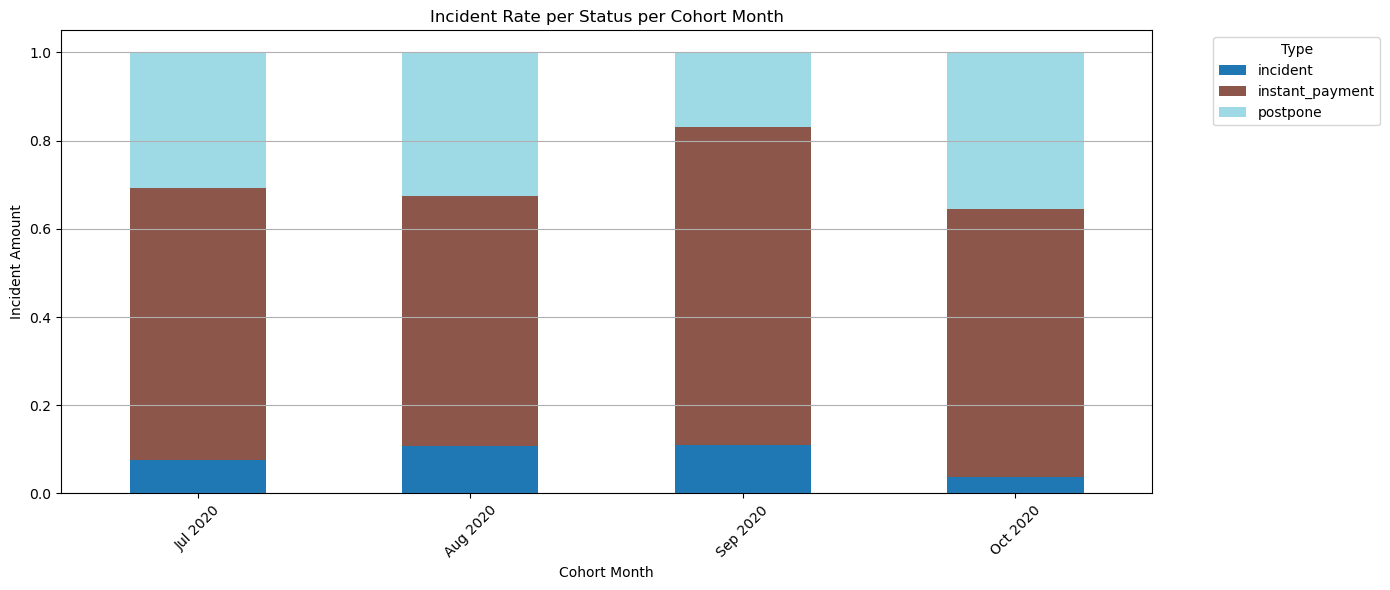

In [81]:
incident_rate.index = pd.to_datetime(incident_rate.index)
incident_rate = incident_rate.sort_index()

incident_rate.index = incident_rate.index.strftime('%b %Y')

incident_rate.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 6),
    colormap='tab20',
    title='Incident Rate per Status per Cohort Month'
)

plt.xlabel('Cohort Month')
plt.ylabel('Incident Amount')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [82]:
incident_rate.head()

type,incident,instant_payment,postpone
cohort,,,
Jul 2020,0.076759,0.616205,0.307036
Aug 2020,0.106685,0.566712,0.326603
Sep 2020,0.108859,0.722785,0.168356
Oct 2020,0.037056,0.607411,0.355533


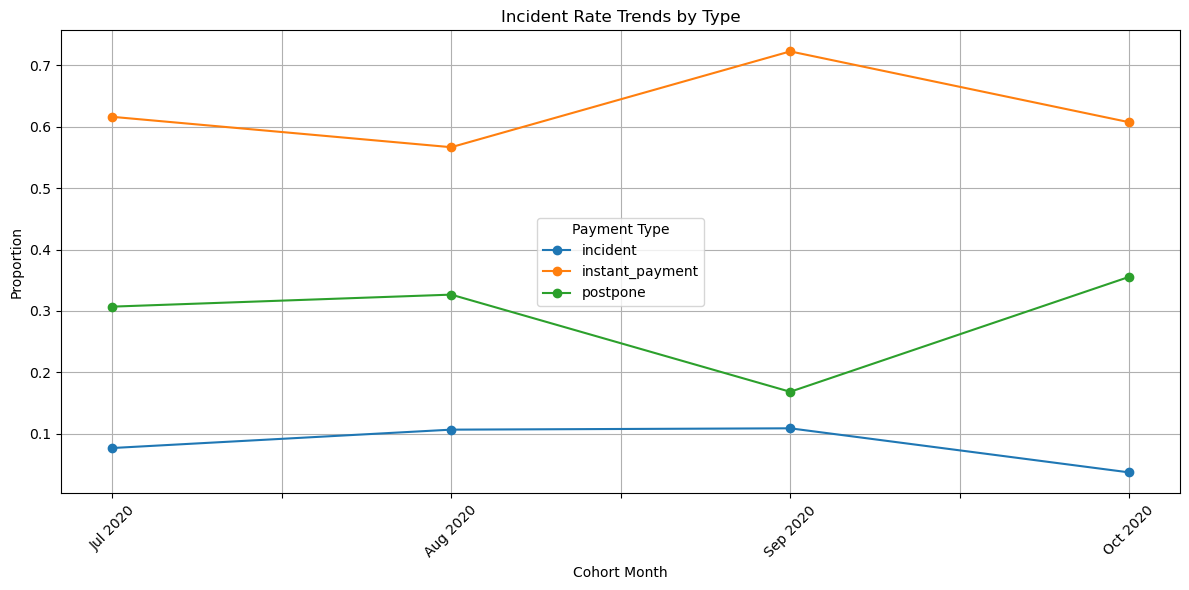

In [83]:
incident_rate.plot(
    kind='line',
    marker='o',
    figsize=(12, 6),
    title='Incident Rate Trends by Type'
)

plt.xlabel('Cohort Month')
plt.ylabel('Proportion')
plt.legend(title='Payment Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [84]:
fees_with_users.groupby("send_at").agg("count")

,id,type,category,status_x,total_amount,created_at,updated_at,status_y,user_id,cohort
send_at,,,,,,,,,,
2020-07-27 13:02:24.293568+00:00,1,1,0,1,1,1,1,1,1,1
2020-07-27 13:06:49.529731+00:00,1,1,0,1,1,1,1,1,1,1
2020-07-27 13:22:16.338042+00:00,1,1,0,1,1,1,1,1,1,1
2020-07-27 13:25:54.391448+00:00,1,1,0,1,1,1,1,1,1,1
2020-07-27 13:26:07.623454+00:00,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
2020-10-21 16:39:37.410688+00:00,1,1,0,1,1,1,1,1,1,1
2020-10-21 21:33:00.484995+00:00,1,1,0,1,1,1,1,1,1,1
2020-10-21 22:13:38.328337+00:00,1,1,0,1,1,1,1,1,1,1


In [85]:
fees_with_users['created_at'] = pd.to_datetime(fees_with_users['created_at'], errors='coerce')

fees_with_users['usage_month'] = fees_with_users['created_at'].dt.to_period('M')

usage_counts = fees_with_users.groupby(['cohort', 'usage_month']).size().reset_index(name='usage_count')

C:\Users\naatt\AppData\Local\Temp\ipykernel_25228\1308016201.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  fees_with_users['usage_month'] = fees_with_users['created_at'].dt.to_period('M')


In [86]:
cash_request_clean['send_at'] = pd.to_datetime(cash_request_clean['send_at'], errors='coerce')

cash_request_clean = cash_request_clean.dropna(subset=['send_at'])

cash_request_clean['usage_month'] = cash_request_clean['send_at'].dt.strftime('%B')

month_order = ['July', 'August', 'September', 'October', 'November',]
cash_request_clean['usage_month'] = pd.Categorical(cash_request_clean['usage_month'], categories=month_order, ordered=True)

monthly_usage = cash_request_clean['usage_month'].value_counts().sort_index()

In [87]:
print(usage_counts.dtypes)

cohort            object
usage_month    period[M]
usage_count        int64
dtype: object


In [88]:
usage_counts['usage_month'] = usage_counts['usage_month'].astype(str)

In [89]:
usage_counts['usage_count'] = pd.to_numeric(usage_counts['usage_count'], errors='coerce')

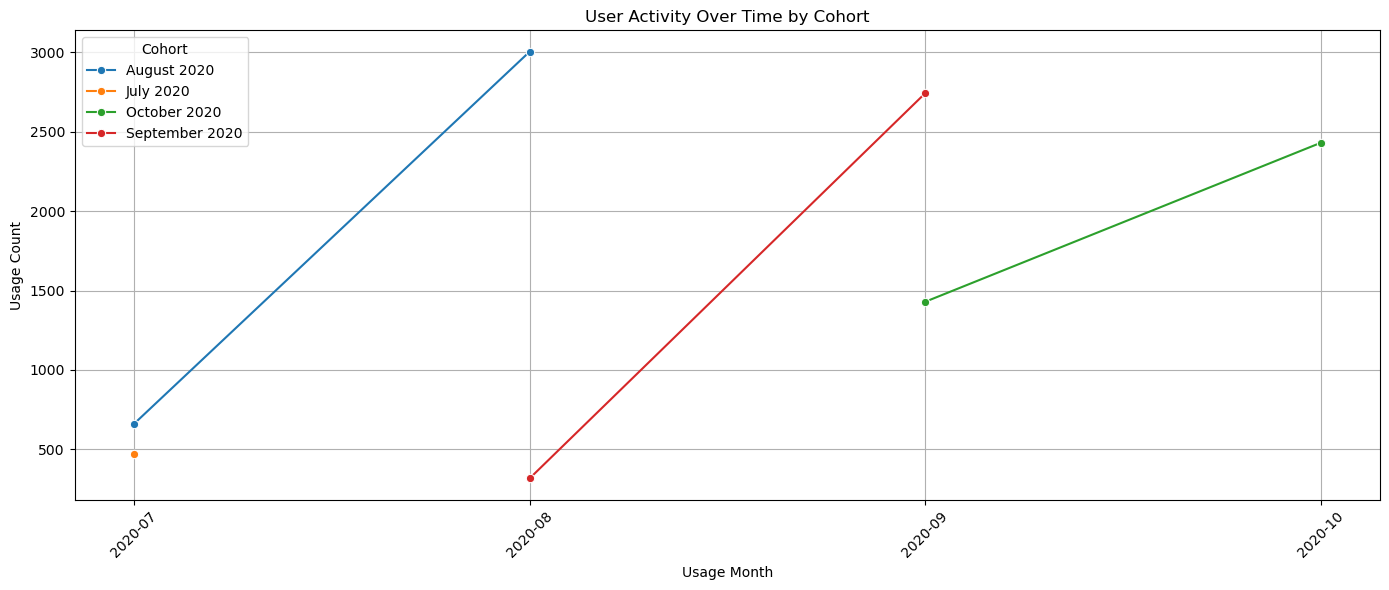

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=usage_counts,
    x='usage_month',
    y='usage_count',
    hue='cohort',
    marker='o'
)

plt.title('User Activity Over Time by Cohort')
plt.xlabel('Usage Month')
plt.ylabel('Usage Count')
plt.xticks(rotation=45)
plt.legend(title='Cohort')
plt.tight_layout()
plt.grid(True)
plt.show()

In [91]:
heatmap_data = usage_counts.pivot(index='cohort', columns='usage_month', values='usage_count')

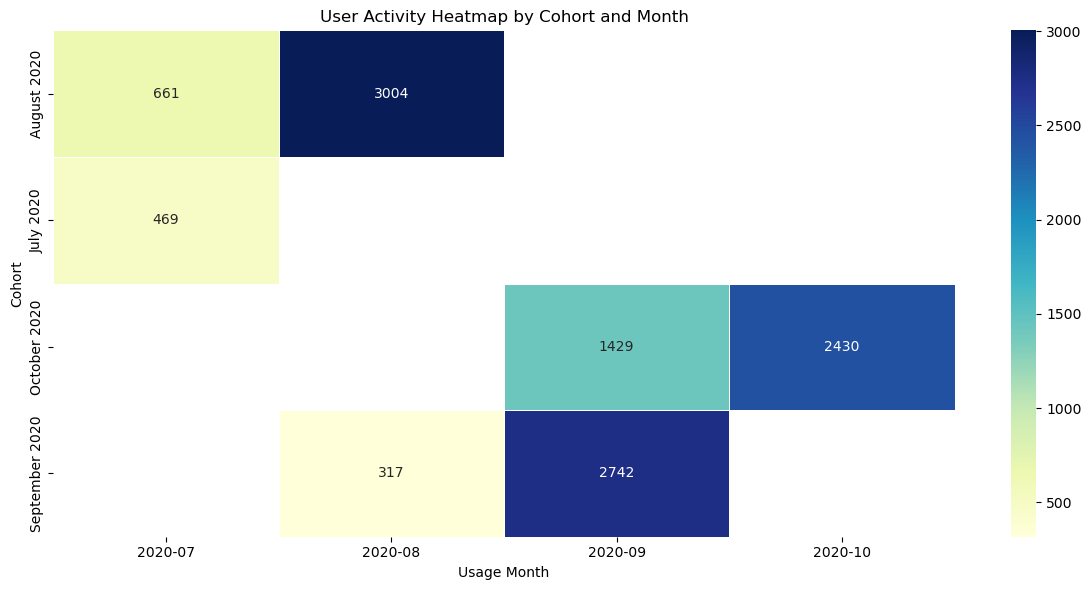

In [92]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('User Activity Heatmap by Cohort and Month')
plt.xlabel('Usage Month')
plt.ylabel('Cohort')
plt.tight_layout()
plt.show()

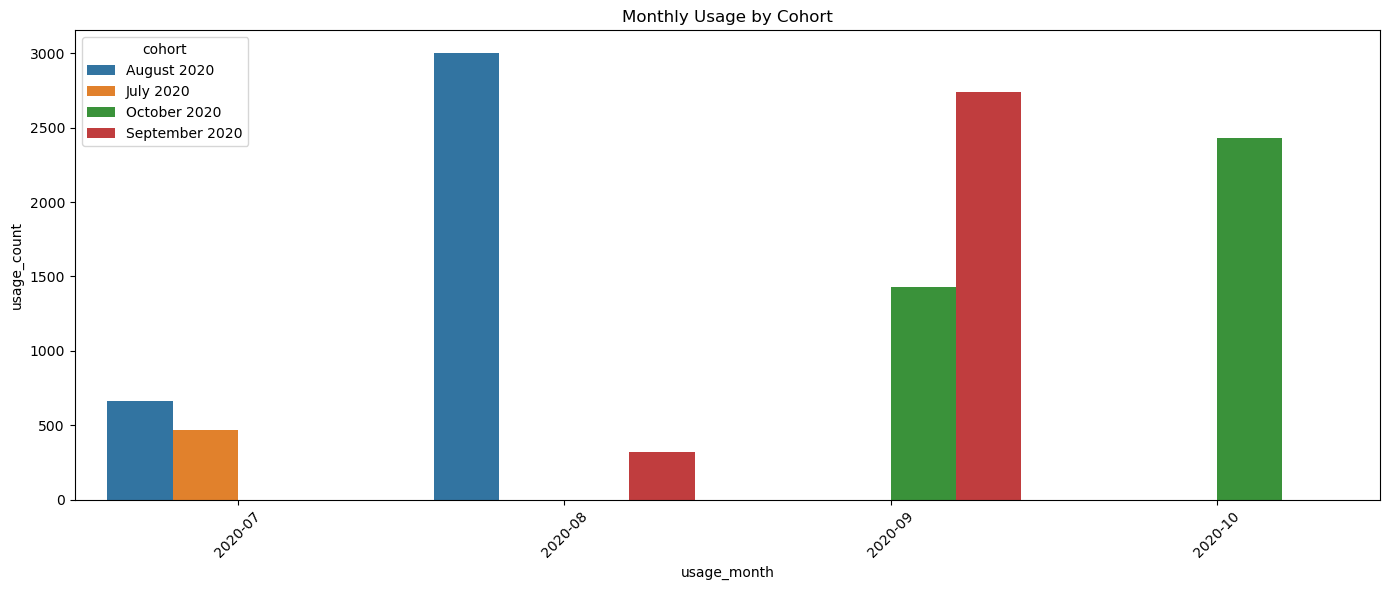

In [93]:
plt.figure(figsize=(14, 6))
sns.barplot(data=usage_counts, x='usage_month', y='usage_count', hue='cohort')
plt.title('Monthly Usage by Cohort')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [94]:
fees_with_users['cohort'].value_counts().sort_index()

cohort
August 2020       3665
July 2020          469
October 2020      3859
September 2020    3059
Name: count, dtype: int64

#### <span style="color:#BBDEFB">Total Revenue

In [95]:
subset_merged_df = fees_with_users[fees_with_users['status_x'] == 'accepted']

In [96]:
subset_merged_df

,id,type,category,status_x,total_amount,created_at,updated_at,send_at,status_y,user_id,cohort,usage_month
1,6961,incident,rejected_direct_debit,accepted,5.0,2020-07-07 17:45:03.352406+00:00,2020-12-18 13:10:14.466442+00:00,NaT,money_back,6961.0,NaN,2020-07
2,16296,instant_payment,NaN,accepted,5.0,2020-09-15 19:05:39.267562+00:00,2020-12-18 13:09:14.593043+00:00,2020-09-22 19:05:39.221698+00:00,money_back,16296.0,September 2020,2020-09
3,20775,instant_payment,NaN,accepted,5.0,2020-10-13 08:15:07.746660+00:00,2020-12-18 13:11:57.614945+00:00,2020-10-13 08:16:15.684807+00:00,money_back,20775.0,October 2020,2020-10
4,11242,instant_payment,NaN,accepted,5.0,2020-08-06 22:46:50.681779+00:00,2020-12-18 13:10:59.725981+00:00,2020-08-13 22:46:50.681310+00:00,money_back,11242.0,August 2020,2020-08
5,17029,instant_payment,NaN,accepted,5.0,2020-09-21 06:17:14.044173+00:00,2020-12-18 13:11:03.097376+00:00,2020-09-28 06:17:13.995704+00:00,money_back,17029.0,September 2020,2020-09
...,...,...,...,...,...,...,...,...,...,...,...,...
20997,12867,instant_payment,NaN,accepted,5.0,2020-08-18 05:07:56.130552+00:00,2020-08-18 09:21:01.619758+00:00,2020-08-25 05:07:56.082082+00:00,rejected,12867.0,August 2020,2020-08
21002,15712,incident,rejected_direct_debit,accepted,5.0,2020-09-11 13:23:48.422634+00:00,2020-12-18 13:10:49.840215+00:00,2020-09-18 13:23:48.380809+00:00,money_back,15712.0,September 2020,2020-09
21009,14209,incident,rejected_direct_debit,accepted,5.0,NaT,NaT,NaT,NaN,NaN,NaN,NaT
21039,18244,incident,month_delay_on_payment,accepted,5.0,2020-09-28 19:10:16.657783+00:00,2020-12-18 13:11:23.507206+00:00,2020-10-05 19:10:16.636122+00:00,money_back,18244.0,October 2020,2020-09


In [97]:
total_revenue=subset_merged_df.groupby("cohort")["total_amount"].sum().reset_index()

In [98]:
total_revenue['cohort'] = pd.to_datetime(total_revenue['cohort'], format='%B %Y')

In [99]:
total_revenue['cohort'] = total_revenue['cohort'].dt.strftime('%B %Y')

In [100]:
total_revenue

,cohort,total_amount
0,August 2020,13375.0
1,July 2020,1730.0
2,October 2020,13415.0
3,September 2020,12315.0


In [101]:
total_revenue['cohort_dt'] = pd.to_datetime(total_revenue['cohort'], format='%B %Y')

total_revenue = total_revenue.sort_values('cohort_dt')

total_revenue['cohort'] = pd.Categorical(
    total_revenue['cohort'],
    categories=total_revenue['cohort'],
    ordered=True
)

C:\Users\naatt\AppData\Local\Temp\ipykernel_25228\1129353242.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


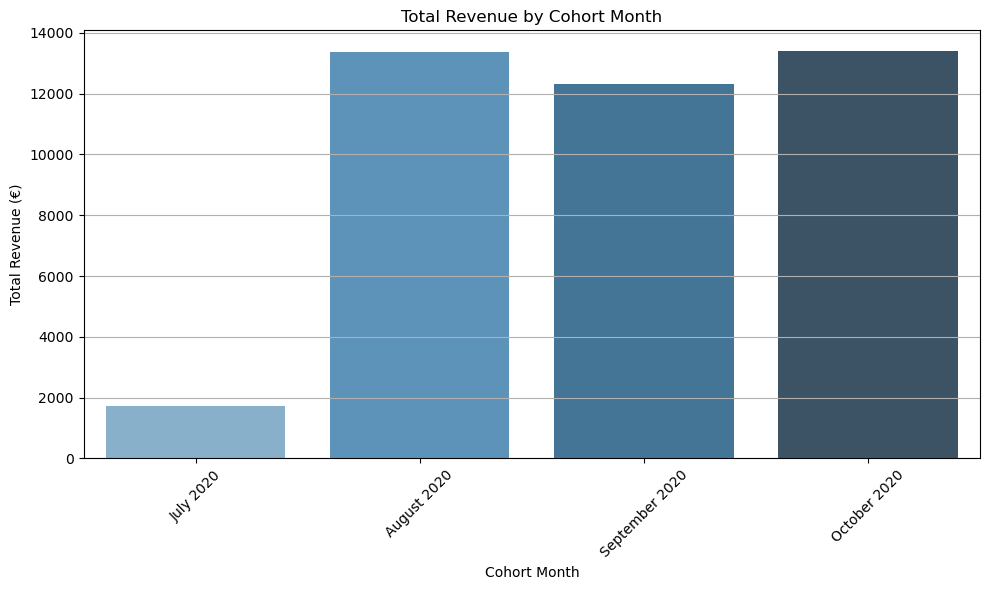

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=total_revenue,
    x='cohort',
    y='total_amount',
    palette='Blues_d'
)

plt.title('Total Revenue by Cohort Month')
plt.xlabel('Cohort Month')
plt.ylabel('Total Revenue (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()